In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [42]:
# 加载数据
file_path = "VIF.xlsx"
data = pd.read_excel(file_path)

In [43]:
features = ['ER', 'PR', 'HER2+FISH', 'ki-67', '手术前怀孕', '手术前生产', 
            '治疗后怀孕', '治疗后生产', 'LN转移个数', '腋窝淋巴结状态', 
            'N分期', '分化', '病理T分期','目前月经情况'  
]

In [44]:
df = data[features]

In [45]:
df

,ER,PR,HER2+FISH,ki-67,手术前怀孕,手术前生产,治疗后怀孕,治疗后生产,LN转移个数,腋窝淋巴结状态,N分期,分化,病理T分期,目前月经情况
0,30,10,1,0.20,2,1,0,0,5,1,2,2,2,6
1,70,95,2,0.10,1,1,0,0,2,1,1,1,1,1
2,80,70,1,0.05,3,1,0,0,0,0,0,2,1,5
3,3,3,0,0.60,2,2,0,0,6,1,2,3,1,7
4,80,90,3,0.05,4,1,0,0,0,0,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,90,90,0,0.40,2,2,0,0,0,0,0,2,2,2
1362,70,95,0,0.45,0,0,0,0,1,1,1,2,1,1
1363,0,0,1,0.40,1,1,0,0,8,1,2,2,2,1
1364,95,95,2,0.15,3,1,0,0,0,0,0,2,1,2


In [46]:
# 3. 构建重命名字典
rename_dict = {
    '病理T分期': 'Pathological T Stage',
    'LN转移个数': 'Number of Lymph Node Metastases',
    '腋窝淋巴结状态': 'Axillary Lymph Node Status',
    'N分期': 'N Stage',
    '分化': 'Differentiation Grade',
    '手术前怀孕': 'Preoperative pregnancies',
    '手术前生产': 'Preoperative delivery',
    '治疗后怀孕':'Post-treatment pregnancy',
    '治疗后生产':'Post-treatment delivery',
    '目前月经情况':'Current menstrual status'
}

In [47]:
# 4. 执行重命名
df.rename(columns=rename_dict, inplace=True)

<ipython-input-47-26b3cd9619a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_dict, inplace=True)


In [48]:
#df.drop(['N Stage','Differentiation Grade','ER','Preoperative delivery','Pathological T Stage'], axis=1, inplace=True)
df.drop(['N Stage','Differentiation Grade','ER','Preoperative delivery','Pathological T Stage'], axis=1, inplace=True)

<ipython-input-48-f5e3d1008fe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['N Stage','Differentiation Grade','ER','Preoperative delivery','Pathological T Stage'], axis=1, inplace=True)


In [49]:
feature_names = df.columns.tolist()

In [50]:
feature_names

['PR',
 'HER2+FISH',
 'ki-67',
 'Preoperative pregnancies',
 'Post-treatment pregnancy',
 'Post-treatment delivery',
 'Number of Lymph Node Metastases',
 'Axillary Lymph Node Status',
 'Current menstrual status']

<ipython-input-51-c1e549ef20de>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='feature', data=vif_data.sort_values('VIF', ascending=False),


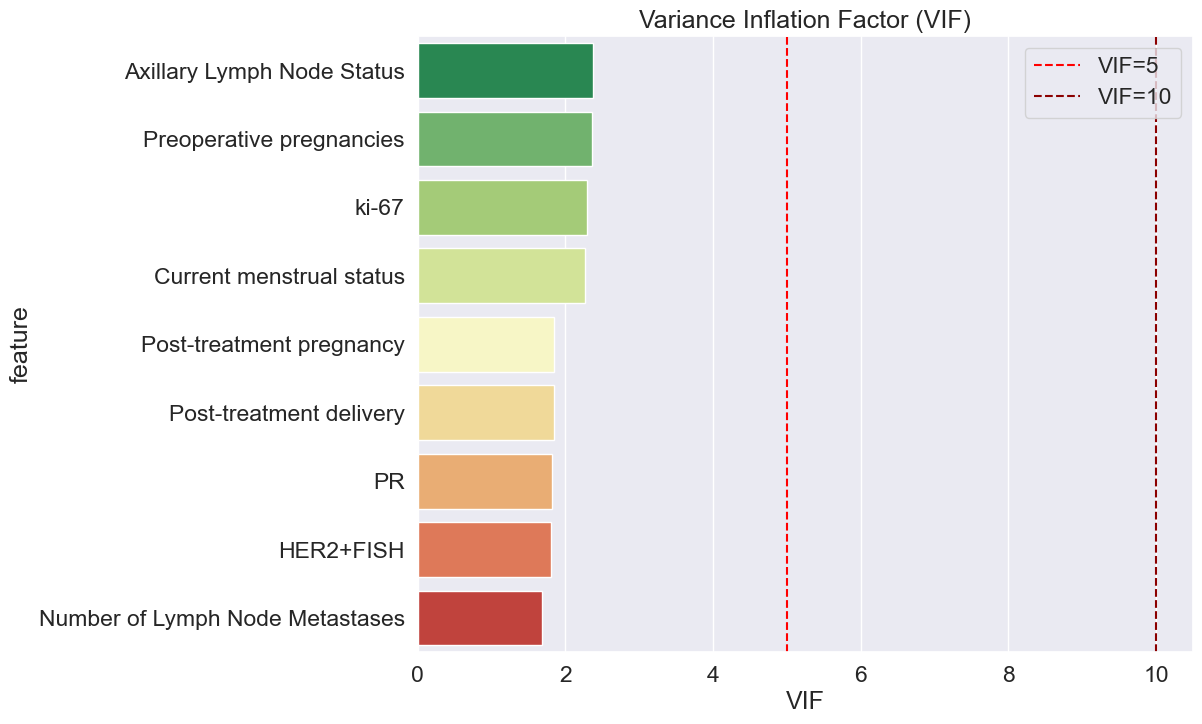

In [51]:
vif_data = pd.DataFrame()
vif_data["feature"] = feature_names
vif_data["VIF"] = [variance_inflation_factor(df, i) for i in range(df.shape[1])]
    
plt.figure(figsize=(10, 8))
sns.set_style("white")  # 使用白色背景
sns.set(font_scale=1.5)
sns.barplot(x='VIF', y='feature', data=vif_data.sort_values('VIF', ascending=False),
            palette="RdYlGn_r")
plt.axvline(5, color='red', linestyle='--', label='VIF=5')
plt.axvline(10, color='darkred', linestyle='--', label='VIF=10')
plt.legend()
plt.title("Variance Inflation Factor (VIF)")
# 保存图片（在显示前保存）
plt.savefig('vif_analysis6.svg', format='svg', bbox_inches='tight') 
plt.show()

In [52]:
vif_data

,feature,VIF
0,PR,1.821301
1,HER2+FISH,1.801942
2,ki-67,2.286207
3,Preoperative pregnancies,2.365250
4,Post-treatment pregnancy,1.845421
5,Post-treatment delivery,1.840811
6,Number of Lymph Node Metastases,1.681719
7,Axillary Lymph Node Status,2.366702
8,Current menstrual status,2.264425
